In [330]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
import matplotlib.pyplot as plt #matplotlibの呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [331]:
#emotion_labelデータの読みこみ

data1_a_label = pd.read_csv('emotion_label/A/emotion_A_20201111_1_50.csv')
data1_b_label = pd.read_csv('emotion_label/A/emotion_A_20201111_1_60.csv')
data1_c_label = pd.read_csv('emotion_label/A/emotion_A_20201111_1_70.csv')
data1_d_label = pd.read_csv('emotion_label/A/emotion_A_20201111_1_80.csv')
# data2_a_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_A_20201111_2_datetime.csv')
# data2_b_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_B_20201111_2_datetime.csv')
# data2_c_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_C_20201111_2_datetime.csv')
# data2_d_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_D_20201111_2_datetime.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_a_record_all_feature = pd.read_csv('feature/A/data1_a_50_record_all_feature.csv')
data1_b_record_all_feature = pd.read_csv('feature/A/data1_a_60_record_all_feature.csv')
data1_c_record_all_feature = pd.read_csv('feature/A/data1_a_70_record_all_feature.csv')
data1_d_record_all_feature = pd.read_csv('feature/A/data1_a_80_record_all_feature.csv')

# data2_a_record_all_feature = pd.read_csv('feature/feature_record/data2_a_record_all_feature_kai.csv')
# data2_b_record_all_feature = pd.read_csv('feature/feature_record/data2_b_record_all_feature_kai.csv')
# data2_c_record_all_feature = pd.read_csv('feature/feature_record/data2_c_record_all_feature_kai.csv')
# data2_d_record_all_feature = pd.read_csv('feature/feature_record/data2_d_record_all_feature_kai.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data1_a_record_all_feature)
display(data1_b_label)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,9205,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,9205,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,9012,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,9012,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,9012,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,9200,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950
683,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,8739,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007
684,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,8739,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464
685,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,8739,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788


,start_time,finish_time,emotion_level,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,5:48,5:52,1,NaN,NaN,NaN
1,5:49,5:53,1,NaN,NaN,NaN
2,5:50,5:54,1,NaN,NaN,NaN
3,5:51,5:55,1,NaN,NaN,NaN
4,5:52,5:56,1,NaN,NaN,NaN
...,...,...,...,...,...,...
681,20:19,20:23,2,NaN,NaN,NaN
682,20:20,20:24,2,NaN,NaN,NaN
683,20:21,20:25,2,NaN,NaN,NaN
684,20:22,20:26,2,NaN,NaN,NaN


In [333]:
data1_a_record_all_feature.head(38)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,9205,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,9205,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,9012,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,9012,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,9012,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949
5,2020-11-11 12:40:23,2020-11-11 12:40:27,9965.756,-1500.773,-387.076,246.362,339.093,239.776,47215.256464,1.738890e+06,...,9012,-3279,-3188,-2049,-2212,-1074,9.784736,80.971606,0.391389,921.107081
6,2020-11-11 12:40:31,2020-11-11 12:40:35,10054.822,408.990,-1676.249,-86.230,126.045,-21.072,69884.928316,2.195737e+05,...,8636,-991,-3200,-3714,-3474,-1312,1.565558,125.284031,0.391389,629.093124
7,2020-11-11 12:40:32,2020-11-11 12:40:36,10046.533,538.998,-1669.254,126.856,52.298,-90.215,61776.514911,1.196996e+05,...,8636,-801,-3200,-3092,-3474,-1312,4.305284,88.449405,0.391389,577.735704
8,2020-11-11 12:40:39,2020-11-11 12:40:43,10043.615,541.746,-1697.731,3.122,90.332,-17.436,125551.644775,3.837647e+04,...,8895,-50,-3498,-1122,-4005,-616,3.522505,345.272979,0.391389,460.351788
9,2020-11-11 12:40:40,2020-11-11 12:40:44,10067.262,538.957,-1604.651,-7.606,119.276,-20.507,38055.363356,1.811111e+04,...,9147,9,-3000,-1122,-1511,-403,3.913894,121.997550,0.782779,232.903585


In [138]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data1_a_label = dropna(data1_a_label)
data1_b_label = dropna(data1_b_label)
data1_c_label = dropna(data1_c_label)
data1_d_label = dropna(data1_d_label)

In [139]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_a_label = data1_a_label.drop(["start_time", "finish_time"], axis=1)
data1_b_label = data1_b_label.drop(["start_time", "finish_time"], axis=1)
data1_c_label = data1_c_label.drop(["start_time", "finish_time"], axis=1)
data1_d_label = data1_d_label.drop(["start_time", "finish_time"], axis=1)
# data2_a_label = data2_a_label.drop(["timeHMS", "subject"], axis=1)
# data2_b_label = data2_b_label.drop(["timeHMS", "subject"], axis=1)
# data2_c_label = data2_c_label.drop(["timeHMS", "subject"], axis=1)
# data2_d_label = data2_d_label.drop(["timeHMS", "subject"], axis=1)

#確認
data1_a_label

,emotion_level
0,1
1,1
2,1
3,1
4,1
...,...
682,2
683,2
684,2
685,2


In [140]:
#feature_dataとemotion_labelデータを連結
data1_a_record_all_feature = pd.concat([data1_a_record_all_feature, data1_a_label], axis=1, ignore_index=False)
data1_b_record_all_feature = pd.concat([data1_b_record_all_feature, data1_b_label], axis=1, ignore_index=False)
data1_c_record_all_feature = pd.concat([data1_c_record_all_feature, data1_c_label], axis=1, ignore_index=False)
data1_d_record_all_feature = pd.concat([data1_d_record_all_feature, data1_d_label], axis=1, ignore_index=False)

# data2_a_record_all_feature = pd.concat([data2_a_record_all_feature, data2_a_label], axis=1, ignore_index=False)
# data2_b_record_all_feature = pd.concat([data2_b_record_all_feature, data2_b_label], axis=1, ignore_index=False)
# data2_c_record_all_feature = pd.concat([data2_c_record_all_feature, data2_c_label], axis=1, ignore_index=False)
# data2_d_record_all_feature = pd.concat([data2_d_record_all_feature, data2_d_label], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のAさんのデータを表示している)
display(data1_a_record_all_feature)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,1
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,1
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,1
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,1
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950,2
683,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007,2
684,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464,2
685,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788,2


In [311]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data1_a_record_all_feature_1 = data1_a_record_all_feature.iloc[0:38]
data1_a_record_all_feature_2 = data1_a_record_all_feature.iloc[38:687]
# data1_a_record_all_feature_3 = data1_a_record_all_feature.iloc[471:687]

In [312]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が0より大きいときはpositive
# emotion_levelの列の数値が0のときはneutral
# emotion_levelの列の数値が0より小さいときはnegative

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
#     data_record_all_feature.loc[data_record_all_feature["emotion_level"] < 0, "label"] = "negative"
    return data_record_all_feature

# data1_a_record_all_feature = emotion_level_define(data1_a_record_all_feature)
# data1_b_record_all_feature = emotion_level_define(data1_b_record_all_feature)
# data1_c_record_all_feature = emotion_level_define(data1_c_record_all_feature)
# data1_d_record_all_feature = emotion_level_define(data1_d_record_all_feature)

data1_a_record_all_feature_1 = emotion_level_define(data1_a_record_all_feature_1)
data1_a_record_all_feature_2 = emotion_level_define(data1_a_record_all_feature_2)
# data1_a_record_all_feature_3 = emotion_level_define(data1_a_record_all_feature_3)

# data2_a_record_all_feature = emotion_level_define(data2_a_record_all_feature)
# data2_b_record_all_feature = emotion_level_define(data2_b_record_all_feature)
# data2_c_record_all_feature = emotion_level_define(data2_c_record_all_feature)
# data2_d_record_all_feature = emotion_level_define(data2_d_record_all_feature)

/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [313]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature

# data1_a_record_all_feature = emotion_level_drop(data1_a_record_all_feature)
# data1_b_record_all_feature = emotion_level_drop(data1_b_record_all_feature)
# data1_c_record_all_feature = emotion_level_drop(data1_c_record_all_feature)
# data1_d_record_all_feature = emotion_level_drop(data1_d_record_all_feature)

data1_a_record_all_feature_1 = emotion_level_drop(data1_a_record_all_feature_1)
data1_a_record_all_feature_2 = emotion_level_drop(data1_a_record_all_feature_2)
# data1_a_record_all_feature_3 = emotion_level_drop(data1_a_record_all_feature_3)

# data2_a_record_all_feature = emotion_level_drop(data2_a_record_all_feature)
# data2_b_record_all_feature = emotion_level_drop(data2_b_record_all_feature)
# data2_c_record_all_feature = emotion_level_drop(data2_c_record_all_feature)
# data2_d_record_all_feature = emotion_level_drop(data2_d_record_all_feature)

/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [314]:
data1_a_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,other
5,2020-11-11 12:40:23,2020-11-11 12:40:27,9965.756,-1500.773,-387.076,246.362,339.093,239.776,47215.256464,1.738890e+06,...,-3279,-3188,-2049,-2212,-1074,9.784736,80.971606,0.391389,921.107081,other
6,2020-11-11 12:40:31,2020-11-11 12:40:35,10054.822,408.990,-1676.249,-86.230,126.045,-21.072,69884.928316,2.195737e+05,...,-991,-3200,-3714,-3474,-1312,1.565558,125.284031,0.391389,629.093124,other
7,2020-11-11 12:40:32,2020-11-11 12:40:36,10046.533,538.998,-1669.254,126.856,52.298,-90.215,61776.514911,1.196996e+05,...,-801,-3200,-3092,-3474,-1312,4.305284,88.449405,0.391389,577.735704,other
8,2020-11-11 12:40:39,2020-11-11 12:40:43,10043.615,541.746,-1697.731,3.122,90.332,-17.436,125551.644775,3.837647e+04,...,-50,-3498,-1122,-4005,-616,3.522505,345.272979,0.391389,460.351788,other
9,2020-11-11 12:40:40,2020-11-11 12:40:44,10067.262,538.957,-1604.651,-7.606,119.276,-20.507,38055.363356,1.811111e+04,...,9,-3000,-1122,-1511,-403,3.913894,121.997550,0.782779,232.903585,other


In [315]:
#全データを連結
# all_data_feature = pd.concat([data1_a_record_all_feature, data1_b_record_all_feature, data1_c_record_all_feature, data1_d_record_all_feature, data2_a_record_all_feature, data2_b_record_all_feature, data2_c_record_all_feature, data2_d_record_all_feature], ignore_index=False)
# all_data_feature = all_data_feature.reset_index(drop=True)
# all_data_feature

# all_data_feature = pd.concat([all_data_feature, feature_emg],axis=1, ignore_index=False)
# col = all_data_feature.columns.tolist()
# col.remove("label")
# col.append("label")
# all_data_feature = all_data_feature[col]

#全データからpositiveの数を確認
data1_a_record_all_feature_positive_1 = data1_a_record_all_feature_1[data1_a_record_all_feature_1.label == "positive"]
data1_a_record_all_feature_positive_1 = data1_a_record_all_feature_positive_1.reset_index(drop=True)
# all_data_feature_positive = all_data_feature_positive.head(16)
print(len(data1_a_record_all_feature_positive_1))

data1_a_record_all_feature_positive_2 = data1_a_record_all_feature_2[data1_a_record_all_feature_2.label == "positive"]
data1_a_record_all_feature_positive_2 = data1_a_record_all_feature_positive_2.reset_index(drop=True)
# all_data_feature_positive = all_data_feature_positive.head(16)
print(len(data1_a_record_all_feature_positive_2))

# data1_a_record_all_feature_positive_3 = data1_a_record_all_feature_3[data1_a_record_all_feature_3.label == "positive"]
# data1_a_record_all_feature_positive_3 = data1_a_record_all_feature_positive_3.reset_index(drop=True)
# # all_data_feature_positive = all_data_feature_positive.head(16)
# print(len(data1_a_record_all_feature_positive_3))


# data1_a_record_all_feature_positive_2 = data1_a_record_all_feature[data1_a_record_all_feature_1.label == "positive"]
# data1_a_record_all_feature_positive_2= data1_a_record_all_feature_positive_2.reset_index(drop=True)
# # all_data_feature_positive = all_data_feature_positive.head(16)
# print(len(data1_a_record_all_feature_positive_2))


# data1_b_record_all_feature_positive = data1_b_record_all_feature[data1_b_record_all_feature.label == "positive"]
# data1_b_record_all_feature_positive = data1_b_record_all_feature_positive.reset_index(drop=True)
# # all_data_feature_positive = all_data_feature_positive.head(16)
# print(len(data1_b_record_all_feature_positive))

# data1_c_record_all_feature_positive = data1_c_record_all_feature[data1_c_record_all_feature.label == "positive"]
# data1_c_record_all_feature_positive = data1_c_record_all_feature_positive.reset_index(drop=True)
# # all_data_feature_positive = all_data_feature_positive.head(16)
# print(len(data1_c_record_all_feature_positive))

# data1_d_record_all_feature_positive = data1_d_record_all_feature[data1_d_record_all_feature.label == "positive"]
# data1_d_record_all_feature_positive = data1_d_record_all_feature_positive.reset_index(drop=True)
# # all_data_feature_positive = all_data_feature_positive.head(16)
# print(len(data1_d_record_all_feature_positive))

# #全データからotherの数を確認
data1_a_record_all_feature_other_1 = data1_a_record_all_feature_1[data1_a_record_all_feature_1.label == "other"]
data1_a_record_all_feature_other_1 = data1_a_record_all_feature_other_1.reset_index(drop=True)
# data1_a_record_all_feature_other = data1_a_record_all_feature.head(143)
print(len(data1_a_record_all_feature_other_1))

data1_a_record_all_feature_other_2 = data1_a_record_all_feature_2[data1_a_record_all_feature_2.label == "other"]
data1_a_record_all_feature_other_2 = data1_a_record_all_feature_other_2.reset_index(drop=True)
# data1_a_record_all_feature_other = data1_a_record_all_feature.head(143)
print(len(data1_a_record_all_feature_other_2))

# data1_a_record_all_feature_other_3 = data1_a_record_all_feature_3[data1_a_record_all_feature_3.label == "other"]
# data1_a_record_all_feature_other_3 = data1_a_record_all_feature_other_3.reset_index(drop=True)
# # data1_a_record_all_feature_other = data1_a_record_all_feature.head(143)
# print(len(data1_a_record_all_feature_other_3))

# data1_b_record_all_feature_other = data1_b_record_all_feature[data1_b_record_all_feature.label == "other"]
# data1_b_record_all_feature_other = data1_b_record_all_feature_other.reset_index(drop=True)
# # data1_a_record_all_feature_other = data1_a_record_all_feature.head(143)
# print(len(data1_b_record_all_feature_other))

# data1_c_record_all_feature_other = data1_c_record_all_feature[data1_c_record_all_feature.label == "other"]
# data1_c_record_all_feature_other = data1_c_record_all_feature_other.reset_index(drop=True)
# # data1_a_record_all_feature_other = data1_a_record_all_feature.head(143)
# print(len(data1_c_record_all_feature_other))

# data1_d_record_all_feature_other = data1_d_record_all_feature[data1_d_record_all_feature.label == "other"]
# data1_d_record_all_feature_other = data1_d_record_all_feature_other.reset_index(drop=True)
# # data1_a_record_all_feature_other = data1_a_record_all_feature.head(143)
# print(len(data1_d_record_all_feature_other))

16
127
22
522


In [323]:
train_data = data1_a_record_all_feature_2
test_data = data1_a_record_all_feature_1

# train_data = data1_a_record_all_feature_1
# test_data = pd.concat([data1_a_record_all_feature_2, data1_a_record_all_feature_3], ignore_index=True)

# train_data = pd.concat([data1_a_record_all_feature_1, data1_a_record_all_feature_2], ignore_index=True)
# test_data = data1_a_record_all_feature_3

# train_data = pd.concat([data1_a_record_all_feature_1, data1_a_record_all_feature_2], ignore_index=True)
# test_data = data1_a_record_all_feature_3

In [324]:
X_train = train_data.iloc[0:,2:28]
y_train = train_data.label

X_test = test_data.iloc[0:,2:28]
y_test = test_data.label

In [325]:
# X1 = data1_a_record_all_feature.iloc[0:,0:28]
# y1 = data1_a_record_all_feature.label

# X2 = data1_b_record_all_feature.iloc[0:,0:28]
# y2 = data1_b_record_all_feature.label

# X3 = data1_c_record_all_feature.iloc[0:,0:28]
# y3 = data1_c_record_all_feature.label

# X4 = data1_d_record_all_feature.iloc[0:,0:28]
# y4 = data1_d_record_all_feature.label

In [326]:
random = RandomForestClassifier(random_state=42)
loo=LeaveOneOut()

score = cross_val_score(random, X, y, cv = 5)
print(score.mean())
print(score)

# score = cross_val_score(random, X2, y2, cv = 5)
# print(score.mean())
# print(score)

# score = cross_val_score(random, X3, y3, cv = 5)
# print(score.mean())
# print(score)

# score = cross_val_score(random, X4, y4, cv = 5)
# print(score.mean())
# print(score)

0.6297872340425532
[0.53191489 0.64893617 0.60638298 0.73404255 0.62765957]


In [151]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()
# score = cross_val_score(random, X, y, cv = loo)
# print(score.mean())
# print(score)

In [327]:
level_names = ["other", "positive"]

# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, stratify=y3, random_state=42)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, stratify=y4, random_state=42)

In [35]:
# from sklearn.model_selection import GridSearchCV
# # use a full grid over all parameters
# param_grid = {"max_depth": [2,3, None],
#               "n_estimators":[50,100,200,300,400,500],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# forest_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
#                  param_grid = param_grid,   
#                  scoring="accuracy",  #metrics
#                  cv = loo,              #cross-validation
#                  n_jobs = 1)          #number of core

# forest_grid.fit(X_train,y_train) #fit

# forest_grid_best = forest_grid.best_estimator_ #best estimator
# print("Best Model Parameter: ",forest_grid.best_params_)

正答率0.34210526315789475
誤った個数：25
classification report
              precision    recall  f1-score   support

       other       0.45      0.59      0.51        22
    positive       0.00      0.00      0.00        16

    accuracy                           0.34        38
   macro avg       0.22      0.30      0.25        38
weighted avg       0.26      0.34      0.30        38

Confusion matrix, without normalization
[[13  9]
 [16  0]]


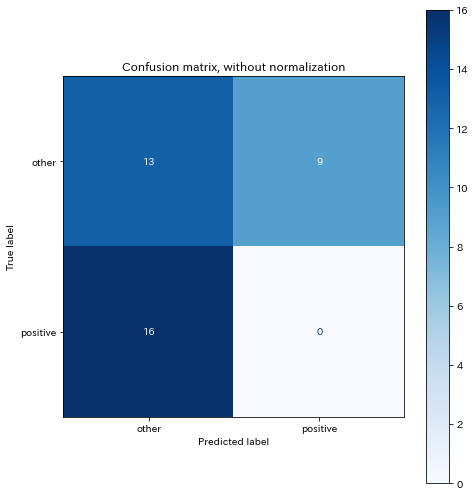

Normalized confusion matrix
[[0.59090909 0.40909091]
 [1.         0.        ]]


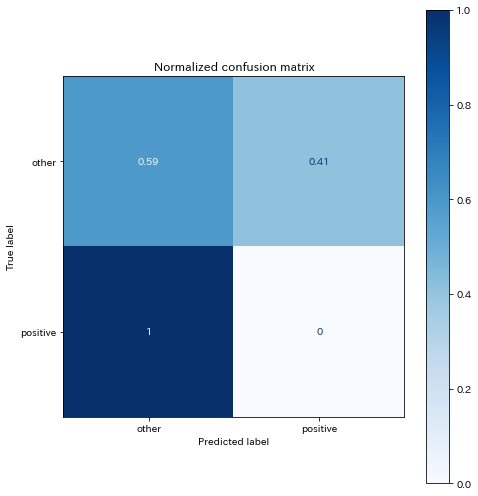

In [328]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [329]:
y_test

0        other
1        other
2        other
3        other
4        other
5        other
6        other
7        other
8        other
9        other
10       other
11       other
12       other
13       other
14       other
15       other
16       other
17       other
18       other
19       other
20       other
21    positive
22    positive
23    positive
24    positive
25    positive
26    positive
27    positive
28    positive
29    positive
30    positive
31    positive
32    positive
33    positive
34    positive
35    positive
36    positive
37       other
Name: label, dtype: object

In [283]:
other = "0"
positive = "1"

y_test = pd.DataFrame(y_test)
y_test_time = data1_a_record_all_feature.iloc[104:687]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "test"]
y_test_time.loc[y_test_time["test"] == "other", "test_label"] = 0
y_test_time.loc[y_test_time["test"] == "positive", "test_label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data1_a_record_all_feature.iloc[104:687]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "predicted"]
predict_time.loc[predict_time["predicted"] == "other", "predicted_label"] = 0
predict_time.loc[predict_time["predicted"] == "positive", "predicted_label"] = 1
predict_time

,start,finish,predicted,predicted_label
0,2020-11-11 12:43:04,2020-11-11 12:43:08,positive,1.0
1,2020-11-11 12:43:05,2020-11-11 12:43:09,positive,1.0
2,2020-11-11 12:43:06,2020-11-11 12:43:10,positive,1.0
3,2020-11-11 12:43:07,2020-11-11 12:43:11,positive,1.0
4,2020-11-11 12:43:08,2020-11-11 12:43:12,positive,1.0
...,...,...,...,...
578,2020-11-11 12:54:49,2020-11-11 12:54:53,positive,1.0
579,2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
580,2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0
581,2020-11-11 12:54:52,2020-11-11 12:54:56,other,0.0


In [284]:
y_test_time["start"] = pd.to_datetime(y_test_time['start'])
predict_time["start"] = pd.to_datetime(predict_time['start'])

y_test_time.set_index("start", inplace=True)
predict_time.set_index("start", inplace=True)

In [285]:
y_test_time

,finish,test,test_label
start,,,
2020-11-11 12:43:04,2020-11-11 12:43:08,other,0.0
2020-11-11 12:43:05,2020-11-11 12:43:09,other,0.0
2020-11-11 12:43:06,2020-11-11 12:43:10,other,0.0
2020-11-11 12:43:07,2020-11-11 12:43:11,other,0.0
2020-11-11 12:43:08,2020-11-11 12:43:12,other,0.0
...,...,...,...
2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0


In [286]:
predict_time

,finish,predicted,predicted_label
start,,,
2020-11-11 12:43:04,2020-11-11 12:43:08,positive,1.0
2020-11-11 12:43:05,2020-11-11 12:43:09,positive,1.0
2020-11-11 12:43:06,2020-11-11 12:43:10,positive,1.0
2020-11-11 12:43:07,2020-11-11 12:43:11,positive,1.0
2020-11-11 12:43:08,2020-11-11 12:43:12,positive,1.0
...,...,...,...
2020-11-11 12:54:49,2020-11-11 12:54:53,positive,1.0
2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0


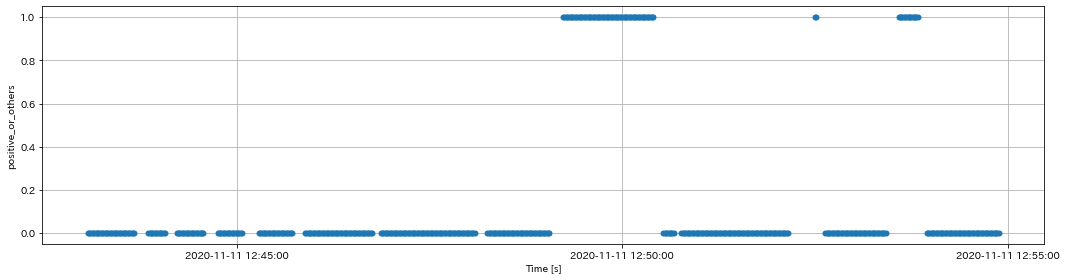

In [302]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(y_test_time.index, y_test_time["test_label"], marker="o", markeredgewidth=0,linewidth=0)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))

plt.xlabel("Time [s]")
plt.ylabel("positive_or_others")
# plt.legend()
plt.tight_layout()
plt.grid(True)

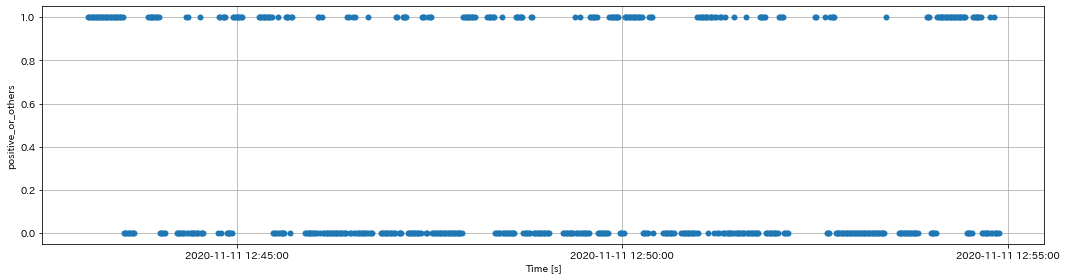

In [301]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(predict_time.index, predict_time["predicted_label"], marker="o", markeredgewidth=0, linewidth=0)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))

plt.xlabel("Time [s]")
plt.ylabel("positive_or_others")
# plt.legend()
plt.tight_layout()
plt.grid(True)

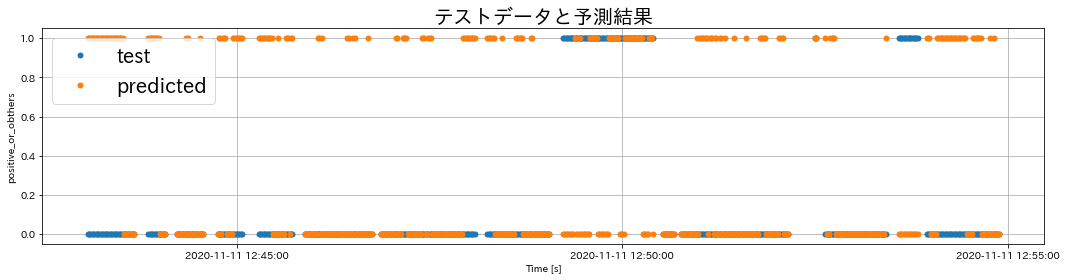

In [303]:
import japanize_matplotlib
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(y_test_time.index, y_test_time["test_label"], marker="o", markeredgewidth=0,linewidth=0, label="test")
ax.plot(predict_time.index, predict_time["predicted_label"], marker="o", markeredgewidth=0, linewidth=0, label="predicted")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))

plt.title("テストデータと予測結果", fontsize=20)
plt.xlabel("Time [s]")
plt.ylabel("positive_or_obthers")
plt.legend(fontsize=20)
plt.tight_layout()
plt.grid(True)

In [107]:
from sklearn import tree
for i,val in enumerate(random.estimators_):
    tree.export_graphviz(random.estimators_[i], out_file='tree_%d.dot'%i)

In [104]:
print('Train Score: {}'.format(round(random.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(random.score(X_test, y_test), 3)))

Train Score: 1.0
 Test Score: 0.983


In [97]:
# title = 'Learning Curves (SVM, linear kernel, $\gamma=%.6f$)' %classifier.best_estimator_.gamma
estimator = random = RandomForestClassifier(random_state=42)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv)
plt.show()

NameError: name 'plot_learning_curve' is not defined

In [40]:
predicted

array(['other', 'other', 'other', 'other', 'other', 'positive', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'positive', 'other', 'other', 'positive', 'other',
       'other', 'positive', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'positive', 'other', 'other', 'other',
       'positive', 'positive', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'positive', 'other', 'other', 'positive', 'other', 'other',
       'other', 'other', 'other', 'positive', 'other', 'other',
       'positive', 'other', 'other', 'positive', 'other', 'other',
       'other', 'positive', 'positive', 'other', 'positive', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'positive',
       'positive', 'other', 'other'

In [55]:
a = pd.DataFrame(y_test.index)

In [59]:
type(a)

pandas.core.frame.DataFrame

In [58]:
type(predicted_test)

pandas.core.frame.DataFrame

In [60]:
test = pd.concat([a, predicted_test], axis = 1)

In [63]:
test.columns = ["index", "label"]

In [64]:
test.set_index("index", inplace=True)

In [65]:
test

,label
index,
207,other
99,other
319,other
474,other
328,other
...,...
83,positive
189,other
300,other


In [80]:
y_test

,index,label
0,1,other
1,11,positive
2,12,positive
3,13,other
4,14,other
...,...,...
133,524,other
134,529,other
135,535,other
136,538,other


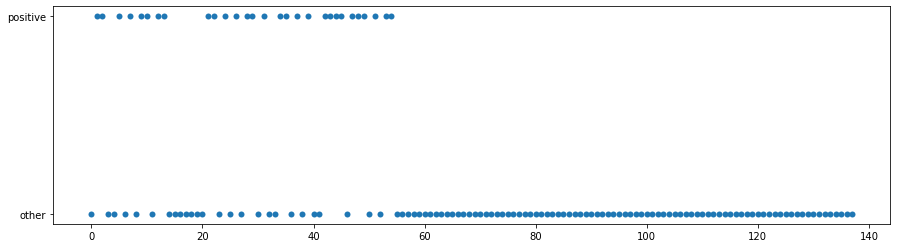

In [82]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(y_test["label"], marker="o", linewidth=0, markeredgewidth=0, label="userA")
# plt.plot(a["label"])

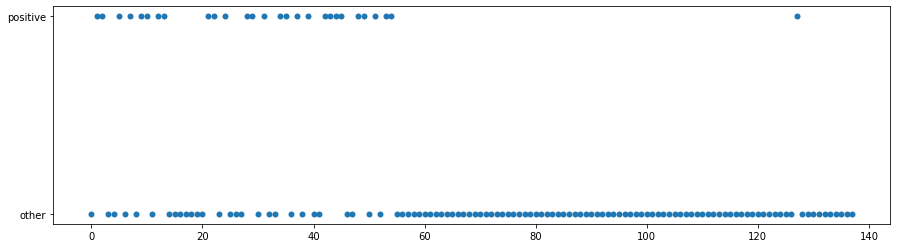

In [78]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(test["label"], marker="o", linewidth=0, markeredgewidth=0, label="userA")
# plt.plot(a["label"])

In [74]:
y_test = y_test.sort_index()
y_test = y_test.reset_index()

In [81]:
test

,index,label
0,1,other
1,11,positive
2,12,positive
3,13,other
4,14,other
...,...,...
133,524,other
134,529,other
135,535,other
136,538,other


In [75]:
y_test

,index,label
0,1,other
1,11,positive
2,12,positive
3,13,other
4,14,other
...,...,...
133,524,other
134,529,other
135,535,other
136,538,other


In [77]:
test = test.sort_index()
test = test.reset_index()

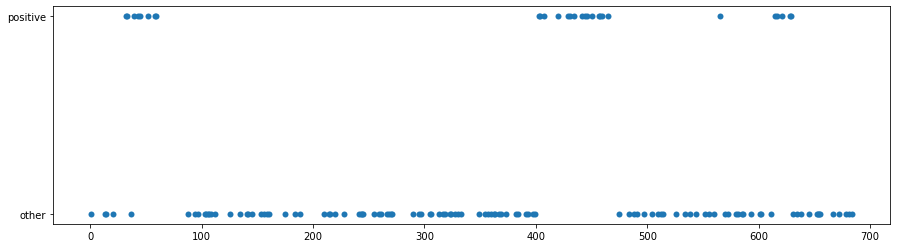

In [77]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(a, marker="o", linewidth=0, markeredgewidth=0, label="userA")
# plt.plot(a["label"])

In [19]:
random.feature_importances_

array([0.02042189, 0.09423777, 0.01968559, 0.01345772, 0.02034657,
       0.02037029, 0.05335069, 0.03983919, 0.0335005 , 0.03166229,
       0.02896834, 0.02570483, 0.04095069, 0.10976789, 0.03386841,
       0.02934377, 0.03776078, 0.03947302, 0.03021334, 0.05313209,
       0.04217655, 0.02334481, 0.03233015, 0.03999916, 0.01893219,
       0.05309673, 0.00429886, 0.00976589])

In [25]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# sfs1 = SFS(RandomForestClassifier(bootstrap=False, criterion='gini', max_depth= 2, max_features= 1, min_samples_leaf= 10, min_samples_split= 2, n_estimators= 300),
#            k_features=36,   # いくつの特徴量を出力させたいのか
#            forward=True,
#            floating=False,
#            verbose=2,
#            scoring='accuracy', # 'r2' なども選択できる。
#            cv=loo)

sfs1 = SFS(RandomForestClassifier(),
           k_features=28,   # いくつの特徴量を出力させたいのか
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy', # 'r2' なども選択できる。
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   17.7s finished

[2021-05-07 05:58:06] Features: 1/28 -- score: 0.9198665554628856[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   17.8s finished

[2021-05-07 05:58:23] Features: 2/28 -- score: 0.9179816513761467[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   16.4s finished

[2021-05-07 05:58:40] Features: 3/28 -- score: 0.9380817347789826[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [15]:
sfs1.k_feature_idx_

()

In [16]:
sfs1.k_feature_names_

()

In [17]:
pd.DataFrame.from_dict(sfs1.get_metric_dict())

""


In [18]:
sfs1.get_metric_dict()

{}

In [19]:
iris = datasets.load_iris()

In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
cancer = load_breast_cancer()

NameError: name 'load_breast_cancer' is not defined

In [ ]:
cancer.names